In [24]:
import random
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

def generate_bigrams(word):
    word = "^" + word + "$"
    bigrams = [word[i:i+2] for i in range(len(word)-1)]
    return bigrams

with open("names.txt") as f:
    names = f.read().splitlines()

all_bigrams = []
for name in names:
    bigrams = generate_bigrams(name)
    all_bigrams.extend(bigrams)

bigram_counts = Counter(all_bigrams)
total_bigram_count = sum(bigram_counts.values())

bigram_probs = {}
for bigram, count in bigram_counts.items():
    bigram_probs[bigram] = count / total_bigram_count

In [9]:
print("Total digram count:", total_bigram_count)
print(bigram_counts)

Total digram count: 228146
Counter({'n$': 6763, 'a$': 6640, 'an': 5438, '^a': 4410, 'e$': 3983, 'ar': 3264, 'el': 3248, 'ri': 3033, 'na': 2977, '^k': 2963, 'le': 2921, 'en': 2675, 'la': 2623, 'ma': 2590, '^m': 2538, 'al': 2528, 'i$': 2489, 'li': 2480, 'ia': 2445, '^j': 2422, 'on': 2411, 'h$': 2409, 'ra': 2356, 'ah': 2332, 'ha': 2244, 'ya': 2143, 'in': 2126, '^s': 2055, 'ay': 2050, 'y$': 2007, 'er': 1958, 'nn': 1906, 'yn': 1826, 'ka': 1731, 'ni': 1725, 're': 1697, '^d': 1690, 'ie': 1653, 'ai': 1650, '^r': 1639, 'am': 1634, 'ly': 1588, '^l': 1572, '^c': 1542, '^e': 1531, 'ja': 1473, 'r$': 1377, 'ne': 1359, 'll': 1345, 'il': 1345, 'is': 1316, 'l$': 1314, '^t': 1308, '^b': 1306, 'da': 1303, 'sh': 1285, 'de': 1283, 'ee': 1271, 'mi': 1256, 'sa': 1201, 's$': 1169, '^n': 1146, 'as': 1118, 'yl': 1104, 'ey': 1070, 'or': 1059, 'ad': 1042, 'ta': 1027, '^z': 929, 'vi': 911, 'ke': 895, 'se': 884, '^h': 874, 'ro': 869, 'es': 861, 'za': 860, 'o$': 855, 'ir': 849, 'br': 842, 'av': 834, 'me': 818, 'ei':

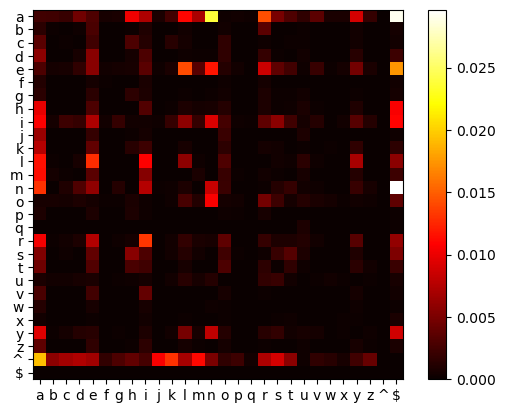

In [25]:
alphabet = "abcdefghijklmnopqrstuvwxyz^$"
matrix = np.zeros((len(alphabet), len(alphabet)))
for i, row_char in enumerate(alphabet):
    for j, col_char in enumerate(alphabet):
        bigram = row_char + col_char
        count = bigram_counts[bigram]
        matrix[i, j] = count / total_bigram_count

plt.imshow(matrix, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(len(alphabet)), list(alphabet))
plt.yticks(np.arange(len(alphabet)), list(alphabet))
plt.colorbar()
plt.show()


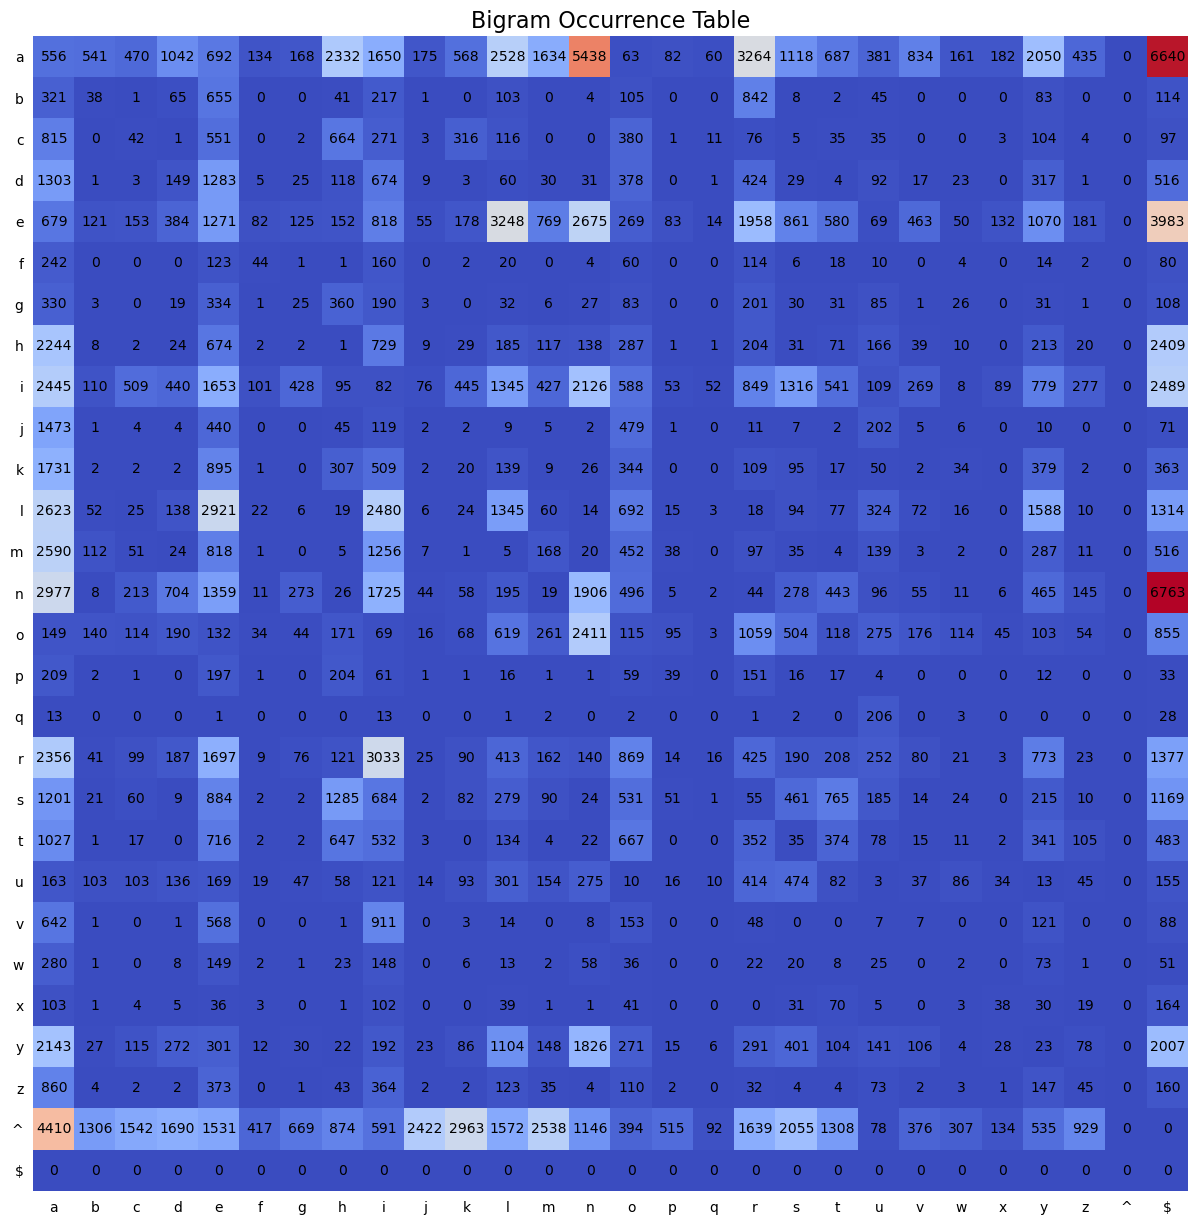

In [27]:
import numpy as np
import matplotlib.pyplot as plt
alphabet = "abcdefghijklmnopqrstuvwxyz^$"
matrix = np.zeros((len(alphabet), len(alphabet)))
for i, row_char in enumerate(alphabet):
    for j, col_char in enumerate(alphabet):
        bigram = row_char + col_char
        count = bigram_counts[bigram]
        matrix[i, j] = count

fig, ax = plt.subplots(figsize=(15, 15))
im = ax.imshow(matrix, cmap='coolwarm', interpolation='nearest')

for i in range(len(alphabet)):
    for j in range(len(alphabet)):
        ax.text(j, i, int(matrix[i, j]), ha='center', va='center')

ax.set_xticks(np.arange(len(alphabet)))
ax.set_yticks(np.arange(len(alphabet)))
ax.set_xticklabels(list(alphabet))
ax.set_yticklabels(list(alphabet))

ax.spines[:].set_visible(False)
ax.tick_params(top=False, bottom=False, left=False, right=False)

ax.set_title("Bigram Occurrence Table", fontsize=16)

plt.show()
